<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-06-26 02:16:36--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  42.0MB/s    in 4.4s    

2025-06-26 02:16:41 (45.4 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [11]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [13]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite2')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()

#### Connect to the SQLite database


In [14]:
conn = sqlite3.connect('survey-data.sqlite2')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [15]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [16]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [17]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


In [22]:
df.columns.tolist()

['COUNT(*)']

In [24]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Create a connection and save the DataFrame
conn = sqlite3.connect('survey-data.sqlite3')
df.to_sql('main', conn, if_exists='replace', index=False)

# Read from the database (optional, shown for demonstration)
query = "SELECT CompTotal FROM main"
comp_df = pd.read_sql_query(query, conn)

# Convert to numeric and drop missing/invalid values
comp_data = pd.to_numeric(comp_df['CompTotal'], errors='coerce').dropna()

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(comp_data, bins=50, color='steelblue', edgecolor='black')
plt.title('Distribution of Total Compensation')
plt.xlabel('Total Compensation')
plt.ylabel('Number of Respondents')
plt.grid(True)
plt.tight_layout()
plt.show()





DatabaseError: Execution failed on sql 'SELECT CompTotal FROM main': no such column: CompTotal

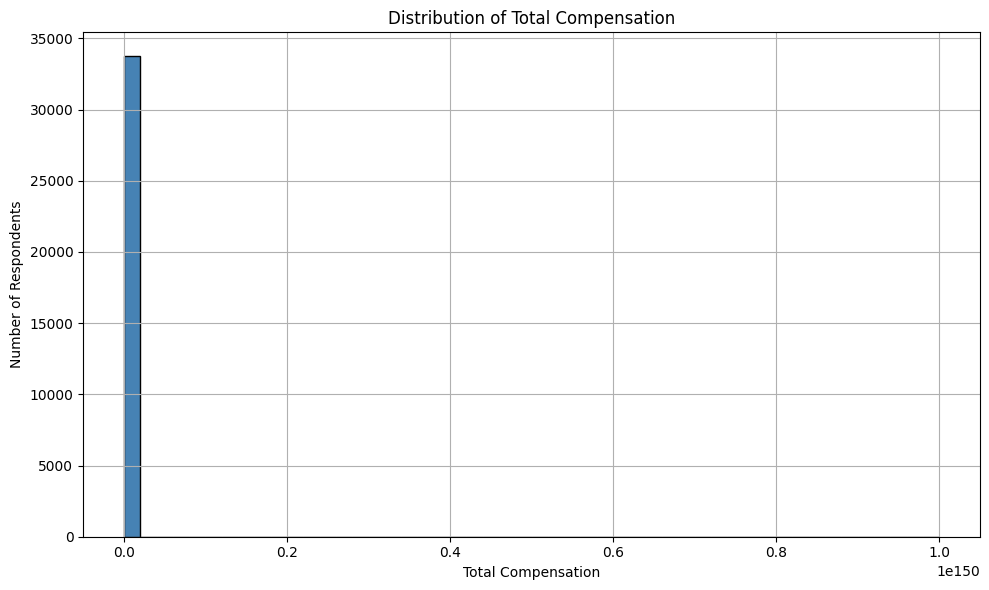

In [25]:
df = pd.read_csv("survey-data.csv")
import matplotlib.pyplot as plt

# Drop missing or invalid compensation values and convert to numeric
comp_data = pd.to_numeric(df['CompTotal'], errors='coerce').dropna()

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(comp_data, bins=50, color='steelblue', edgecolor='black')
plt.title('Distribution of Total Compensation')
plt.xlabel('Total Compensation')
plt.ylabel('Number of Respondents')
plt.grid(True)
plt.tight_layout()
plt.show()


**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


0    NaN
1     17
2     27
3    NaN
4    NaN
Name: YearsCodePro, dtype: object
[nan '17' '27' '7' '11' '25' '12' '10' '3' 'Less than 1 year' '18' '37'
 '15' '20' '6' '2' '16' '8' '14' '4' '45' '1' '24' '29' '5' '30' '26' '9'
 '33' '13' '35' '23' '22' '31' '19' '21' '28' '34' '32' '40' '50' '39'
 '44' '42' '41' '36' '38' 'More than 50 years' '43' '47' '48' '46' '49']


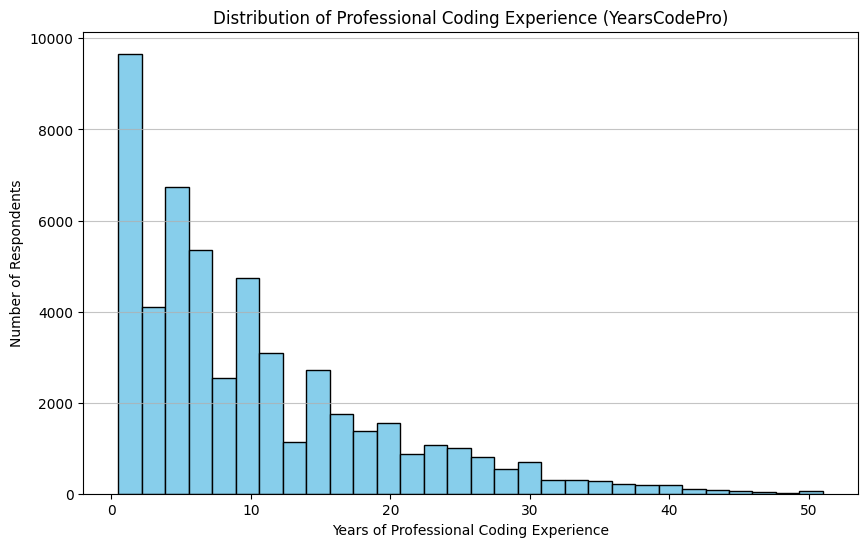

In [26]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df and it contains the 'YearsCodePro' column

# First, check the data type and unique values to understand the format
print(df['YearsCodePro'].head())
print(df['YearsCodePro'].unique())

# Sometimes YearsCodePro can be strings like "Less than 1 year", "More than 50 years", etc.
# We need to convert those to numeric values for the histogram.

def convert_years_code_pro(x):
    if isinstance(x, str):
        if x == "Less than 1 year":
            return 0.5
        elif x == "More than 50 years":
            return 51
        else:
            try:
                return float(x)
            except:
                return None
    else:
        return x

df['YearsCodePro_num'] = df['YearsCodePro'].apply(convert_years_code_pro)

# Drop missing or invalid values
years_code = df['YearsCodePro_num'].dropna()

plt.figure(figsize=(10,6))
plt.hist(years_code, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Professional Coding Experience (YearsCodePro)')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Number of Respondents')
plt.grid(axis='y', alpha=0.75)
plt.show()


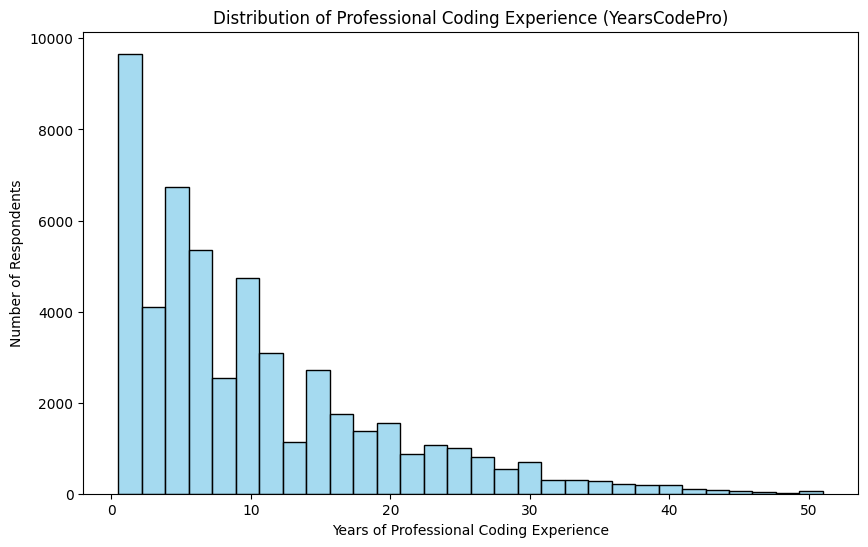

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df['YearsCodePro_num'] is already numeric as in previous example

plt.figure(figsize=(10,6))
sns.histplot(df['YearsCodePro_num'].dropna(), bins=30, kde=False, color='skyblue')
plt.title('Distribution of Professional Coding Experience (YearsCodePro)')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Number of Respondents')
plt.show()


### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


In [29]:
df["Age"].head(20)

0     Under 18 years old
1        35-44 years old
2        45-54 years old
3        18-24 years old
4        18-24 years old
5     Under 18 years old
6        35-44 years old
7        18-24 years old
8        45-54 years old
9        35-44 years old
10       35-44 years old
11       45-54 years old
12       35-44 years old
13       35-44 years old
14       25-34 years old
15       45-54 years old
16    Under 18 years old
17       18-24 years old
18       25-34 years old
19       35-44 years old
Name: Age, dtype: object

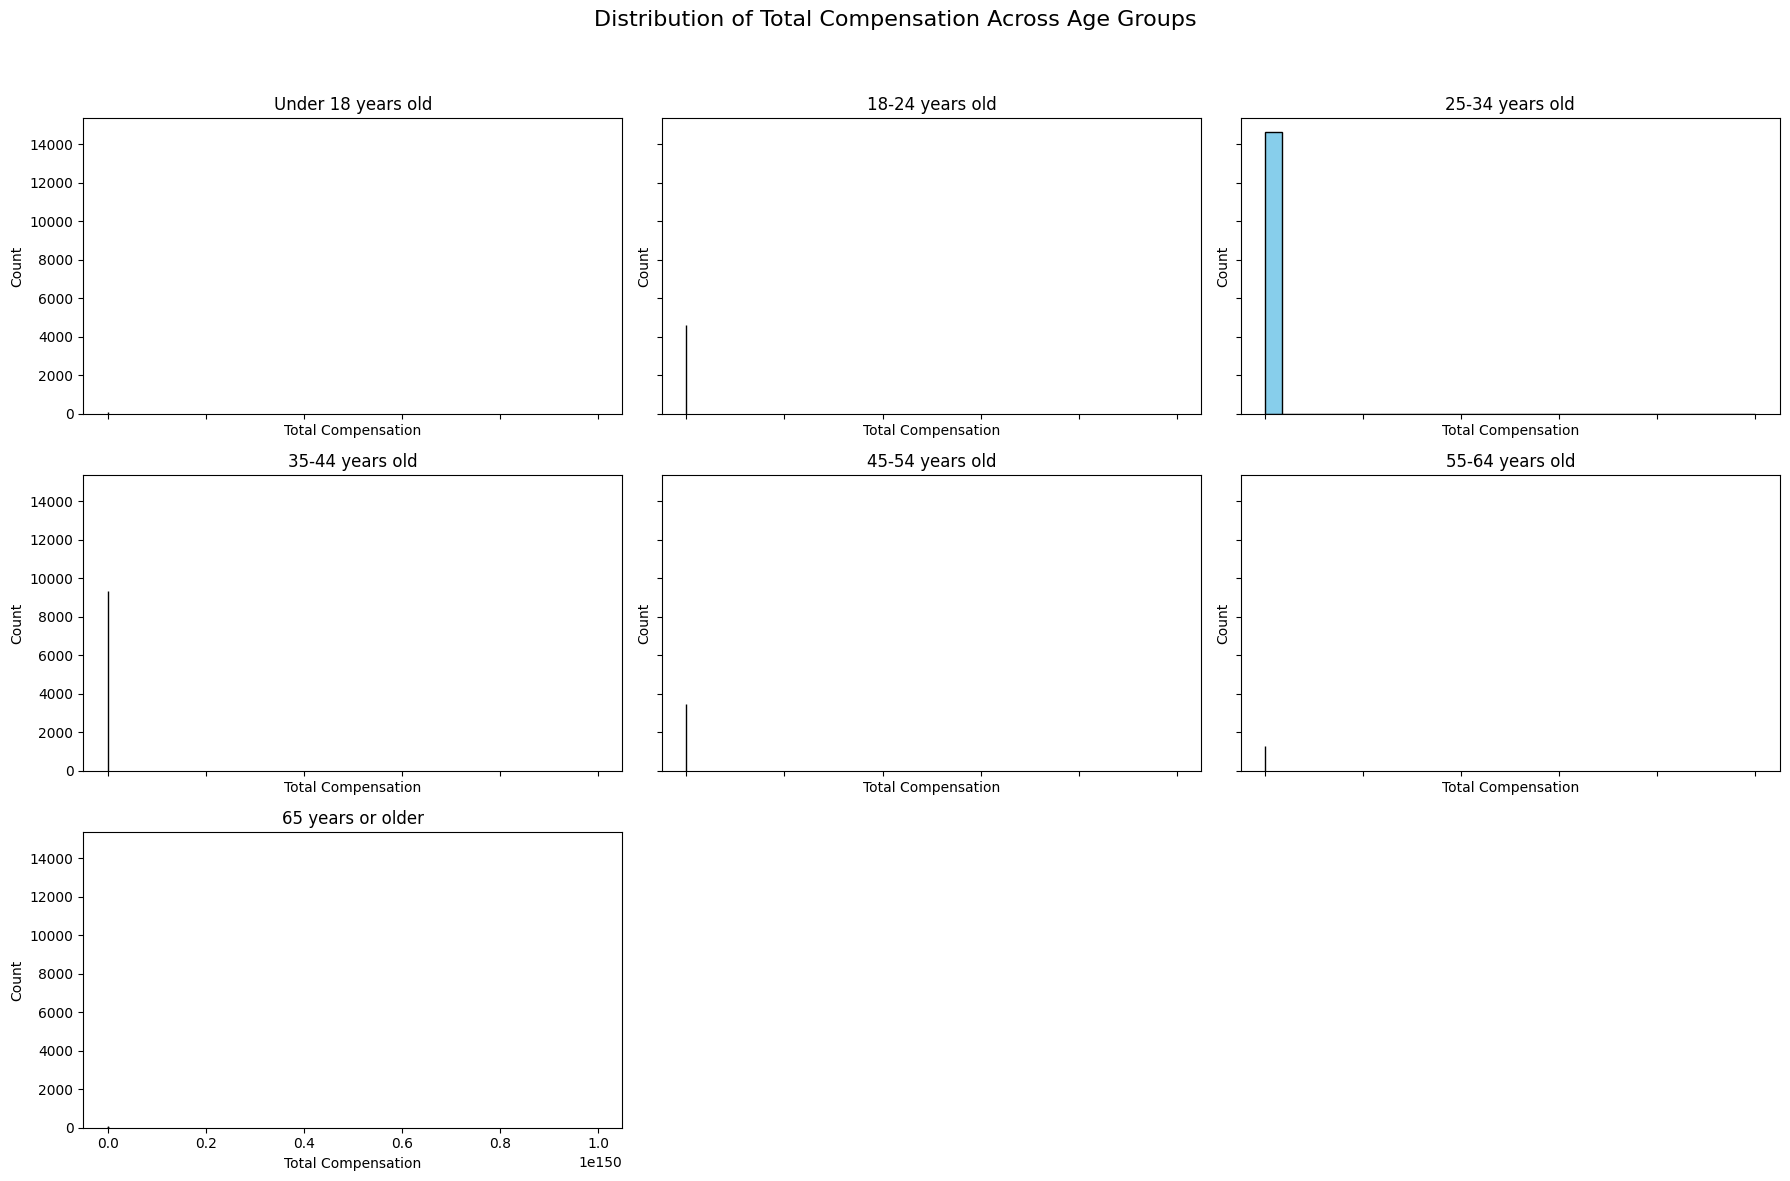

In [31]:
import matplotlib.pyplot as plt

# Filter and clean data as before
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df_filtered = df[(df['CompTotal'] > 0) & (df['CompTotal'].notna())]

# Use only valid Age groups (adjust this list if needed)
valid_age_groups = [
    "Under 18 years old", "18-24 years old", "25-34 years old",
    "35-44 years old", "45-54 years old", "55-64 years old", "65 years or older"
]
df_filtered = df_filtered[df_filtered['Age'].isin(valid_age_groups)]

# Prepare subplots: 3 columns, enough rows for all groups
n_groups = len(valid_age_groups)
cols = 3
rows = (n_groups + cols - 1) // cols  # Ceiling division

fig, axes = plt.subplots(rows, cols, figsize=(cols*6, rows*4), sharex=True, sharey=True)
axes = axes.flatten()  # Flatten in case of multiple rows

bins = 30

for i, age_group in enumerate(valid_age_groups):
    ax = axes[i]
    data = df_filtered[df_filtered['Age'] == age_group]['CompTotal']
    
    ax.hist(data, bins=bins, color='skyblue', edgecolor='black')
    ax.set_title(age_group)
    ax.set_xlabel('Total Compensation')
    ax.set_ylabel('Count')

# Turn off any unused subplots (if any)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Distribution of Total Compensation Across Age Groups', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


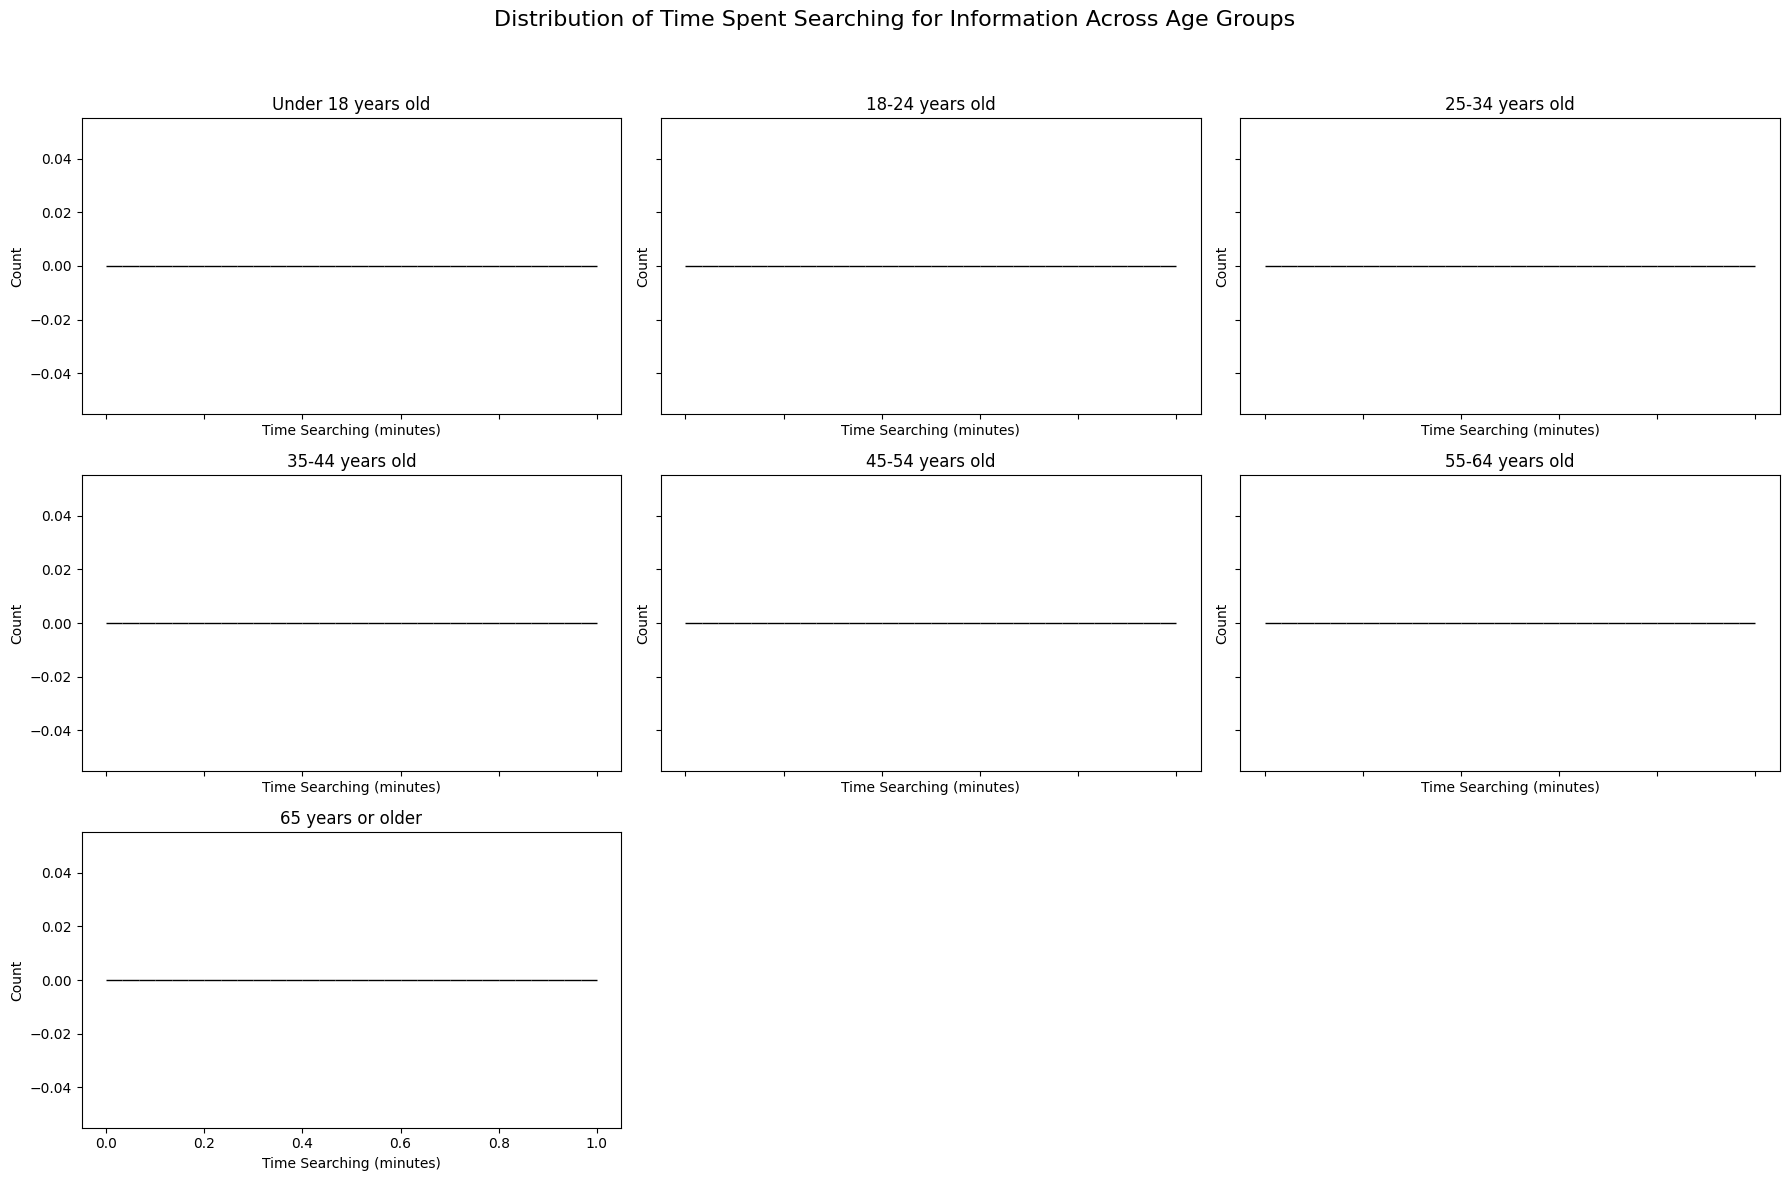

In [32]:
## Write your code here
import matplotlib.pyplot as plt
import pandas as pd

# Convert TimeSearching to numeric, coercing errors to NaN
df['TimeSearching'] = pd.to_numeric(df['TimeSearching'], errors='coerce')

# Filter valid values: positive, non-null
df_filtered = df[(df['TimeSearching'] >= 0) & (df['TimeSearching'].notna())]

# Filter age groups (same valid groups as before)
valid_age_groups = [
    "Under 18 years old", "18-24 years old", "25-34 years old",
    "35-44 years old", "45-54 years old", "55-64 years old", "65 years or older"
]
df_filtered = df_filtered[df_filtered['Age'].isin(valid_age_groups)]

# Prepare subplot grid
n_groups = len(valid_age_groups)
cols = 3
rows = (n_groups + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(cols*6, rows*4), sharex=True, sharey=True)
axes = axes.flatten()

bins = 30  # Adjust as needed

for i, age_group in enumerate(valid_age_groups):
    ax = axes[i]
    data = df_filtered[df_filtered['Age'] == age_group]['TimeSearching']
    
    ax.hist(data, bins=bins, color='lightgreen', edgecolor='black')
    ax.set_title(age_group)
    ax.set_xlabel('Time Searching (minutes)')
    ax.set_ylabel('Count')

# Remove any empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Distribution of Time Spent Searching for Information Across Age Groups', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


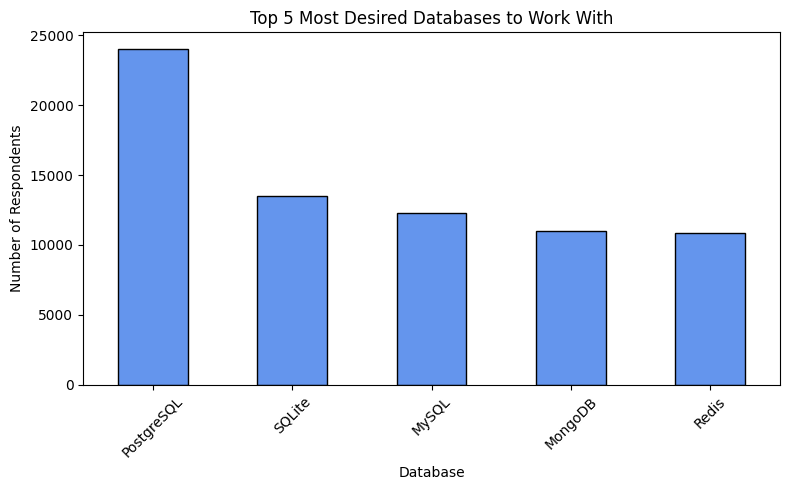

In [33]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Drop missing values in the column
df_filtered = df['DatabaseWantToWorkWith'].dropna()

# Step 1: Split each entry by semicolon and explode into rows
# (assumes multiple entries are separated by semicolons)
df_split = df_filtered.str.split(';').explode().str.strip()

# Step 2: Count frequency of each database
db_counts = df_split.value_counts()

# Step 3: Select top 5 databases
top_5 = db_counts.head(5)

# Step 4: Plot
plt.figure(figsize=(8, 5))
top_5.plot(kind='bar', color='cornflowerblue', edgecolor='black')
plt.title('Top 5 Most Desired Databases to Work With')
plt.xlabel('Database')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


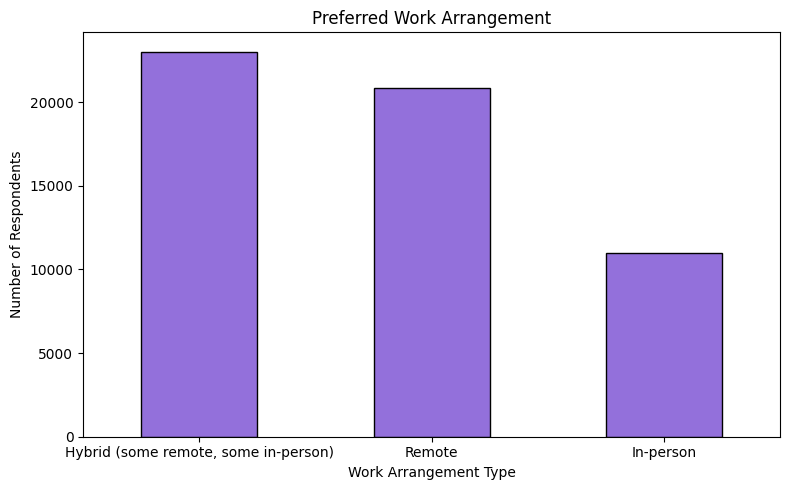

In [35]:
## Write your code here

# Drop missing values
df_filtered = df['RemoteWork'].dropna()

# Count frequency of each arrangement type
arrangement_counts = df_filtered.value_counts()

# Plot as bar chart
plt.figure(figsize=(8, 5))
arrangement_counts.plot(kind='bar', color='mediumpurple', edgecolor='black')

plt.title('Preferred Work Arrangement')
plt.xlabel('Work Arrangement Type')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


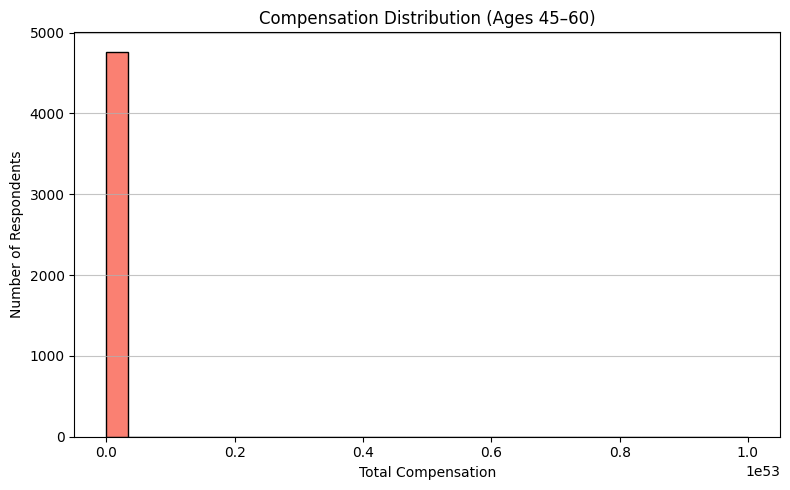

In [36]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Convert CompTotal to numeric
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')

# Step 2: Filter for age groups that fall within 45 to 60 years
target_ages = ['45-54 years old', '55-64 years old']
df_midcareer = df[df['Age'].isin(target_ages)]

# Step 3: Drop missing or invalid CompTotal
df_midcareer = df_midcareer[(df_midcareer['CompTotal'] > 0) & df_midcareer['CompTotal'].notna()]

# Step 4: Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(df_midcareer['CompTotal'], bins=30, color='salmon', edgecolor='black')
plt.title('Compensation Distribution (Ages 45–60)')
plt.xlabel('Total Compensation')
plt.ylabel('Number of Respondents')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()


**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


/tmp/ipykernel_492/3728851275.py:27: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  job_sat_counts = df.pivot_table(index='ExperienceBin', columns='JobSat', aggfunc='size', fill_value=0)


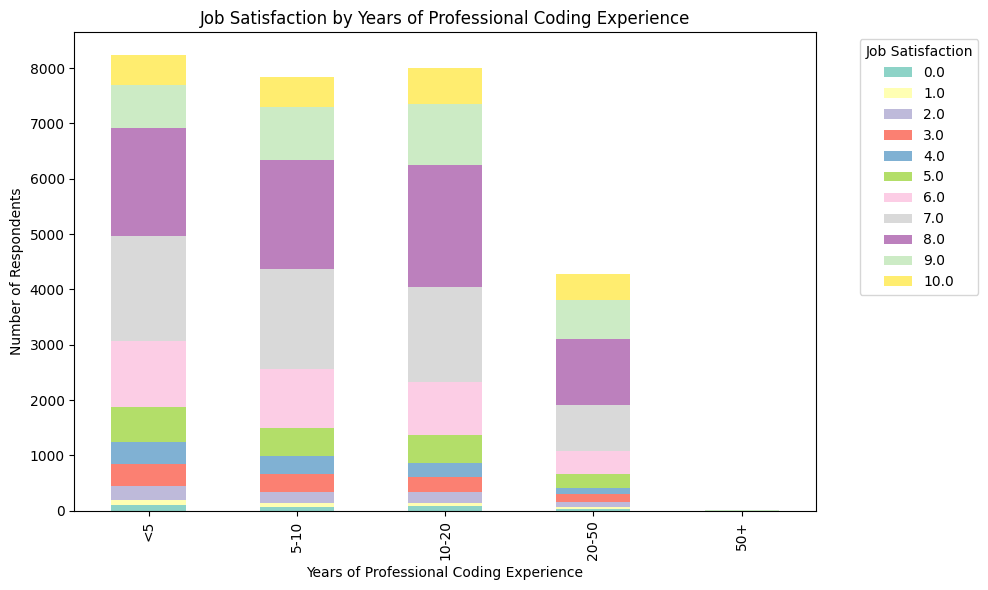

In [37]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Convert YearsCodePro to numeric
def parse_years(x):
    if pd.isna(x):
        return None
    elif x == "Less than 1 year":
        return 0.5
    elif x == "More than 50 years":
        return 51
    else:
        try:
            return float(x)
        except:
            return None

df['YearsCodePro_num'] = df['YearsCodePro'].apply(parse_years)

# Step 2: Bin YearsCodePro into categories
bins = [0, 5, 10, 20, 50, 100]
labels = ['<5', '5-10', '10-20', '20-50', '50+']
df['ExperienceBin'] = pd.cut(df['YearsCodePro_num'], bins=bins, labels=labels, right=False)

# Step 3: Create a pivot table of JobSat counts
job_sat_counts = df.pivot_table(index='ExperienceBin', columns='JobSat', aggfunc='size', fill_value=0)

# Step 4: Plot stacked bar chart
job_sat_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set3')

plt.title('Job Satisfaction by Years of Professional Coding Experience')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Number of Respondents')
plt.legend(title='Job Satisfaction', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [38]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
